# CNN to Classify MNIST Data

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import random
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


## Data Sample

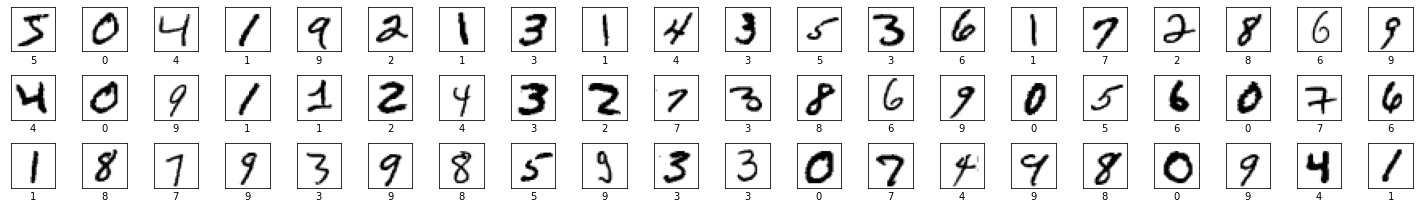

In [3]:
i = 0
plt.figure(figsize=(20,3))
for i in range(60):
    plt.subplot(3, 20, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

## Normalise Data

In [4]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

## CNN Model

In [5]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Conv1D(filters=32, kernel_size=(5), activation='relu'),
    layers.MaxPool1D(pool_size=(2)),
    layers.Conv1D(filters=64, kernel_size=(3), activation='relu'),
    layers.MaxPool1D(pool_size=(2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 32)            4512      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               41088     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Compileing The Model

In [10]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

## Train The Model

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 4s 5ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0665 - val_accuracy: 0.9834
Epoch 2/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0592 - val_accuracy: 0.9848
Epoch 3/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0612 - val_accuracy: 0.9850
Epoch 4/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0656 - val_accuracy: 0.9842
Epoch 5/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0803 - val_accuracy: 0.9841


## Ploting the Training Result

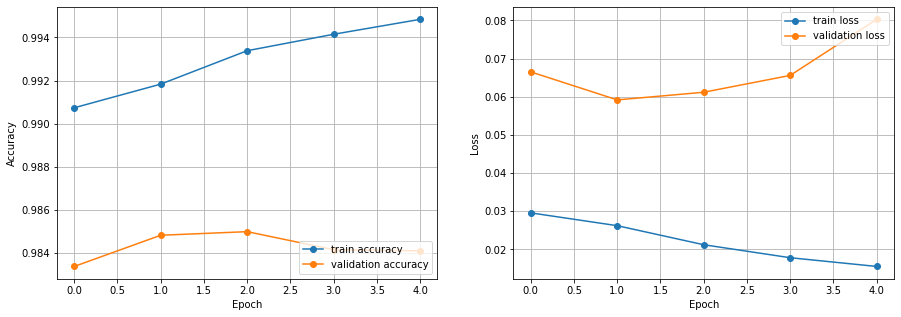

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

## Model Evaluation

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9880

Test accuracy: 0.9879999756813049
